In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skins-season-1-script-with-character-cues/clean_data.csv
/kaggle/input/skins-season-1-script-with-character-cues/dtm.csv
/kaggle/input/skins-season-1-script-with-character-cues/skins_gen_one.csv


In [2]:
# importing all necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lxml
from bs4 import BeautifulSoup as soup 
import requests
from wordcloud import WordCloud, ImageColorGenerator
import nltk

In [3]:
df = pd.read_csv('/kaggle/input/skins-season-1-script-with-character-cues/skins_gen_one.csv')

In [4]:
df.head()

,Characters,Text
0,tony,"it's a funny name. i've seen a few nipples, n..."
1,michelle,"my nipples are not funny, ok?"
2,tony,"well, that's your opinion. anyway, you said y..."
3,michelle,what?!
4,tony,sid. the virgin thing.


In [5]:
df.shape

(6757, 2)

In [6]:
# Make all the text lowercase (done)
# Remove Punctuation (done)
# Remove Numerical Values (done)
# Remove non-sensical text (done)
# Tokenize Text (done)
# Remove Stop Words (done)
# Getting rid of irrevelent characters (done)

pd.set_option('display.max_rows', None)

In [7]:
df['Characters'].value_counts()

sid                  796
tony                 623
chris                568
michelle             503
jal                  435
anwar                402
cassie               370
maxxie               325
mark                 227
angie                218
anthea               144
effy                 140
jim                  139
tom                  125
harriet              114
anna                  90
doug                  78
claire                72
madame deluca         70
graham                70
sketch                60
walter                55
josie                 54
mary                  48
liz                   48
istiak                45
bibi                  45
all                   38
kenneth               35
woman                 35
lachlan               30
girl 1                30
jackie                30
sheila                30
boy 1                 30
girl                  28
dale                  25
pandora               25
muneer                25
mover                 24


In [8]:
# Make all the text lowercase

df['Text'] = df['Text'].str.lower()

In [9]:
df.head()

,Characters,Text
0,tony,"it's a funny name. i've seen a few nipples, n..."
1,michelle,"my nipples are not funny, ok?"
2,tony,"well, that's your opinion. anyway, you said y..."
3,michelle,what?!
4,tony,sid. the virgin thing.


In [10]:
# Remove non-sensical text
import re

df['Text'] = df['Text'].str.replace(r"\(.*\)","")

In [11]:
# Remove Punctuation

import string

df['Text'] = df['Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [12]:
df.head()

,Characters,Text
0,tony,its a funny name ive seen a few nipples nips ...
1,michelle,my nipples are not funny ok
2,tony,well thats your opinion anyway you said youd ...
3,michelle,what
4,tony,sid the virgin thing


In [13]:
# Remove Numerical Values

df['Text'] = df['Text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]) )

In [14]:
df.head()

,Characters,Text
0,tony,its a funny name ive seen a few nipples nips ...
1,michelle,my nipples are not funny ok
2,tony,well thats your opinion anyway you said youd ...
3,michelle,what
4,tony,sid the virgin thing


In [15]:
# Getting rid of irrevelent characters (done)

rev_char = df['Characters'].value_counts().sort_values(ascending=False)[:10].index
df = df.loc[df['Characters'].isin(rev_char)]

In [16]:
df['Characters'].value_counts()

sid         796
tony        623
chris       568
michelle    503
jal         435
anwar       402
cassie      370
maxxie      325
mark        227
angie       218
Name: Characters, dtype: int64

In [17]:
df.shape

(4467, 2)

In [18]:
df.head()

,Characters,Text
0,tony,its a funny name ive seen a few nipples nips ...
1,michelle,my nipples are not funny ok
2,tony,well thats your opinion anyway you said youd ...
3,michelle,what
4,tony,sid the virgin thing


In [19]:
# Setting empty text values to NaN and dropping them 

df['Text'] = df['Text'].apply(lambda x: x if len(x) > 1 else np.nan )
df = df.dropna(axis='rows')

In [20]:
df.isna().sum()

Characters    0
Text          0
dtype: int64

In [21]:
speech = df.groupby(['Characters'], as_index=True)['Text'].apply(lambda x: ''.join(x)).reset_index()
speech.set_index(['Characters'], inplace=True)

speech

,Text
Characters,
angie,oh god i know youre all so lovely to me i ne...
anwar,i cant talk right now ow ah cheers tony tony ...
cassie,yeah wow lovely no but i like that youre funn...
chris,yeah man you rang oh man im in bed i cant im ...
jal,what the fuck are you talking about tony no i...
mark,hi tony what can we do for you what hes what ...
maxxie,yup sorry bruv big gay night out you know me ...
michelle,my nipples are not funny ok what you werent s...
sid,what like what huh whose im listening tony er...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer 

stop_words = nltk.corpus.stopwords.words('english')
extension = ['im', 'ill', 'ive', 'youre', 'dont', 'gonna', 'going', 'go', 'gotta', 'ok', 'got', 'like', 'yeah', 'get',
            'hes', 'oh']
stop_words.extend(extension)

cv = CountVectorizer(stop_words= stop_words)
data_cv = cv.fit_transform(speech['Text'])
data_term_matrix = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_term_matrix.index = speech.index

data_term_matrix = data_term_matrix.T
data_term_matrix.head()

Characters,angie,anwar,cassie,chris,jal,mark,maxxie,michelle,sid,tony
abi,0,0,0,0,0,0,0,0,0,2
abigail,0,0,0,0,0,0,0,12,0,0
abigails,0,0,0,0,0,0,0,0,0,1
aborting,0,0,0,0,0,0,0,0,0,1
abortion,0,0,0,0,6,0,0,0,0,0


In [23]:
df = pd.read_csv('/kaggle/input/skins-season-1-script-with-character-cues/dtm.csv')

In [24]:
df.head()

,Unnamed: 0,angie,anwar,cassie,chris,jal,mark,maxxie,michelle,sid,tony
0,abi,0,0,0,0,0,0,0,0,0,2
1,abigail,0,0,0,0,0,0,0,12,0,0
2,abigails,0,0,0,0,0,0,0,0,0,1
3,aborting,0,0,0,0,0,0,0,0,0,1
4,abortion,0,0,0,0,6,0,0,0,0,0


In [25]:
df.rename(columns={'Unnamed: 0' : 'words'}, inplace=True)

In [26]:
def most_common(col):    
        
    empty_df = pd.DataFrame([])

    char_word = df[['words', col]]
    
    count = df[col].sort_values(ascending=False)[0:10]
    
    top_words = char_word.loc[char_word[col].isin(count)].sort_values(by=col, ascending=False)[0:10]
    
    word_count = str(list(zip(top_words['words'], top_words[col])))
    
    top_ten = pd.concat([empty_df, top_words])
    
    print(top_ten, '\n')

In [27]:
characters = df.columns[1:]

In [28]:
for character in characters:
    most_common(character)

        words  angie
231     chris     29
192      cant     16
487   fucking     16
515       god     13
590      home     12
704    listen     12
1032      see     12
1322     want     12
233    christ     11
278    course     11 

        words  anwar
746       man     50
674      know     26
484      fuck     23
487   fucking     23
1111    sorry     22
988     right     18
1085   sketch     18
1176     take     17
1370     wont     17
149       boy     16 

       words  cassie
231    chris      42
1385     wow      38
1212   think      29
1069     sid      26
717     look      25
970   really      22
1009    said      22
1322    want      21
728   lovely      20
674     know      18 

       words  chris
988    right     82
674     know     63
47     angie     48
1340    well     36
576      hey     35
746      man     35
717     look     32
399      erm     28
639      jal     26
1206  theyre     23 

          words  jal
231       chris   46
771    michelle   31
221      chelle 

In [29]:
text = pd.read_csv('/kaggle/input/skins-season-1-script-with-character-cues/clean_data.csv')

In [30]:
stop_words = nltk.corpus.stopwords.words('english')
    
extension = ['im', 'ill', 'ive', 'youre', 'dont', 'gonna', 'going', 'go', 'gotta', 'ok', 'got', 'like', 'yeah', 'get',
            'hes', 'oh']
    
stop_words.extend(extension)    

In [31]:
def word_cloud(character):

    words = str(text.loc[text['Characters'] == character]['Text'].values)
        
    wc = WordCloud(stopwords=stop_words, background_color = 'white', random_state=42, max_words=35,
                    min_font_size=10).generate(words)
        
    plt.imshow(wc, interpolation='bilinear')
    
    plt.axis('off')
    
    plt.title(character)

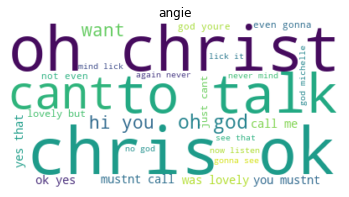

In [32]:
word_cloud('angie')

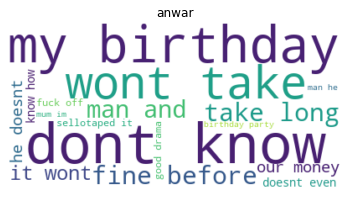

In [33]:
word_cloud('anwar')

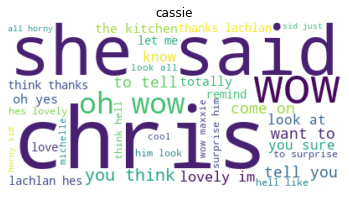

In [34]:
word_cloud('cassie')

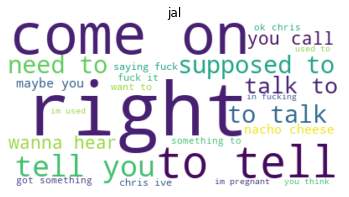

In [35]:
word_cloud('jal')

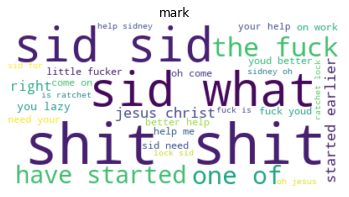

In [36]:
word_cloud('mark')

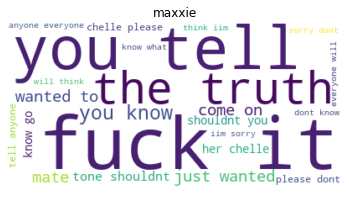

In [37]:
word_cloud('maxxie')

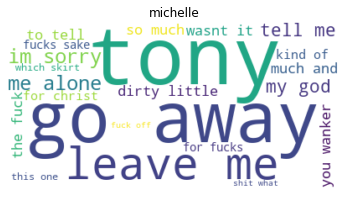

In [38]:
word_cloud('michelle')

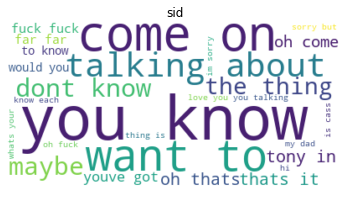

In [39]:
word_cloud('sid')

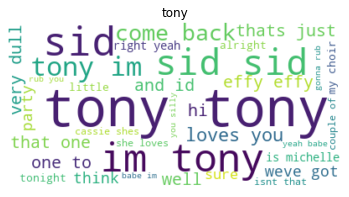

In [40]:
word_cloud('tony')

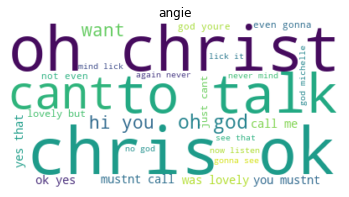

In [41]:
word_cloud('angie')

In [42]:
data = pd.read_csv('/kaggle/input/skins-season-1-script-with-character-cues/skins_gen_one.csv')

In [43]:
data.head()

,Characters,Text
0,tony,"it's a funny name. i've seen a few nipples, n..."
1,michelle,"my nipples are not funny, ok?"
2,tony,"well, that's your opinion. anyway, you said y..."
3,michelle,what?!
4,tony,sid. the virgin thing.


In [44]:
# Remove Numerical Values

data['Text'] = data['Text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]) )

In [45]:
# Remove non-sensical text
import re

data['Text'] = data['Text'].str.replace(r"\(.*\)","")

In [46]:
characters = ['angie', 'anwar', 'cassie', 'chris', 'jal', 'mark', 'maxxie', 'michelle', 'sid', 'tony']

In [47]:
df = data.groupby('Characters', as_index=True)['Text'].apply(lambda x: ''.join(x)).reset_index()
df.head()

,Characters,Text
0,chorus,then came the day osama blew us away. osama b...
1,abigail,"hi. my frands think you're really cool, yah? ..."
2,alan,"you got enough room back there, cassie? you k..."
3,alicia,"you here for my accidental threesome, yeah?"
4,all,yah! no. happy birthday! happy birthday! happ...


In [48]:
df = df.loc[df['Characters'].isin(characters)]

In [49]:
df['Text'] = df['Text'].apply(lambda x: x.replace('...', '.'))

In [50]:
df['Text'] = df['Text'].str.replace('"', '', regex=False) #removing double quotes
df['Text'] = df['Text'].str.replace("'", '', regex=False) #removing singular quotes

In [51]:
df.head()

,Characters,Text
5,angie,"oh, god! i know. youre all so lovely to me...."
8,anwar,"i cant talk right now. ow! ah! cheers, tony! ..."
17,cassie,"yeah, wow, lovely. no. but i like that youre ..."
21,chris,"yeah, man? you rang? oh, man, im in bed. i ca..."
40,jal,"what the fuck are you talking about, tony? no..."


In [52]:
# characters/text in list

def char_text(name):
    text = str(df.loc[df['Characters'] == name]['Text'].values)[3:-3]
    
    return text

In [53]:
# creating the markov chain
# Credit goes to Alice Zhao for providing the function for Markov Chain 

from collections import defaultdict

def markov_chain(text):
    
    words = text.split(' ')
    
    m_dict = defaultdict(list)
    
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    m_dict = dict(m_dict)

    return m_dict

In [54]:
import random

# Credit goes to Alice Zhao for providing the function for Markov Chain 

def txt_generator(chain, count=15):
    
    current_word = random.choice(list(chain.keys()))
    
    sentence = current_word.capitalize()
    
    for i in range(count):
        word_two = random.choice(chain[current_word])
        
        current_word = word_two
        
        sentence += ' ' + word_two
        
    return sentence

In [55]:
txt_generator(markov_chain(char_text('angie')))

'God! i dont see that again, never mind lick it! now listen to tell me whats'

In [56]:
txt_generator(markov_chain(char_text('anwar')))

'Hot women there. oh, man. those russian virgins. yeah? well, thats where they gonna take long.'

In [57]:
txt_generator(markov_chain(char_text('cassie')))

'Erm. malcolm, yeah, wow. sid? hi. this silly game any more. i didnt you think that'

In [58]:
txt_generator(markov_chain(char_text('chris')))

'Fill in the job center, yeah. yeah, maybe. depends if you know? i like someone at'

In [59]:
txt_generator(markov_chain(char_text('jal')))

'Me get a fucking prison. christ. let me get off in public all the young musician'

In [60]:
txt_generator(markov_chain(char_text('mark')))

'Christs sake. you lazy, bone-idle little fucker. did tony fail this? no, of course not! and'

In [61]:
txt_generator(markov_chain(char_text('maxxie')))

'Even going anyway. youre breaking up, tony.  hours? sellotape? so crap, doesnt it? good muslim'

In [62]:
txt_generator(markov_chain(char_text('michelle')))

'Wait anymore, tony. shit! what tony here? so. could i have to neck them all, you'

In [63]:
txt_generator(markov_chain(char_text('sid')))

'Hoping. maybe you hiding away in premium bonds. see, its low risk, with michelle? im inconsolable,'

In [64]:
txt_generator(markov_chain(char_text('tony')))

'Good times. ok, sid. hey. hmm? oh, yeah, sure. no problem. mmm, we love her, ok?'